In [1]:
import pandas as pd
df = pd.read_table('data/clustered.tsv', index_col=['id'])
df['answerCount'] = df.pop('profileInfo.ugcSummary.answerCount')
df['reviewCount'] = df.pop('profileInfo.ugcSummary.reviewCount')

In [2]:
df[df.columns[5:]].head()

,languageCode,postedDate,productId,ratingValue,reviewText,reviewTitle,reviewed,score,languageCode.1,translation.reviewText,...,product_name,material,n_masks,brand,product_price,dayofweek,hour,label_id,answerCount,reviewCount
id,,,,,,,,,,,,,,,,,,,,,
05c2b17e-c28d-4792-930d-27e787d8d4ad,en-US,2021-01-27 09:04:10.569000+00:00,103839,50,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice,True,1.614071e+09,en-US,NaN,...,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85,2,9,4.0,0.0,34.0
80e44af8-2edf-4b81-a80a-7e7888d03cc0,ru-RU,2021-02-07 00:56:39.055000+00:00,103839,50,Внуку очень понравилось. Удобная маска.,Прекрасно!,False,1.612659e+09,ru-RU,The grandson really liked it. Comfortable mask.,...,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85,6,0,8.0,0.0,37.0
9a76e047-21e4-4da3-8b50-9d2396519b6b,en-US,2021-02-06 21:40:02.886000+00:00,103839,40,Easy to put on & comfortable to wear.,Good,False,1.612648e+09,en-US,NaN,...,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85,5,21,6.0,0.0,3.0
2890ac54-8707-418e-be3e-8d46231e3672,ru-RU,2021-02-05 16:29:28.906000+00:00,103839,40,"Тонкая, приятная к телу маска. Расцветка тоже ...",Хорошо,False,1.612543e+09,ru-RU,A thin mask that is pleasant to the body. I li...,...,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85,4,16,1.0,0.0,16.0
9db33354-0457-4efa-bc9c-b5f7ee0eff31,ru-RU,2021-02-05 09:43:42.367000+00:00,103839,50,Отличная маска! Мне подошла идеально. Слегка е...,Прекрасно!,False,1.612518e+09,ru-RU,Great mask! It suited me perfectly. There is a...,...,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85,4,9,2.0,0.0,19.0


In [4]:
c_feats = ['label_id', 'languageCode', 'answerCount', 'reviewCount', 'dayofweek', 'hour']
clusters = df[c_feats].copy()

In [5]:
clusters['label_id'].value_counts()

5.0     481
1.0     437
4.0     415
2.0     409
3.0     401
6.0     383
11.0    350
0.0     314
7.0     306
8.0     249
9.0      11
10.0      3
Name: label_id, dtype: int64

In [6]:
clusters.loc[~clusters['languageCode'].isin(['en-US', 'ru-RU']), 'languageCode'] = 'other'

In [7]:
k = clusters[clusters['label_id'] == 10]
print(k['languageCode'].value_counts(normalize=True))
k.drop(['label_id'], axis=1)

other    0.666667
en-US    0.333333
Name: languageCode, dtype: float64


,languageCode,answerCount,reviewCount,dayofweek,hour
id,,,,,
3e9267e7-01c0-45f2-8621-0253d4dbbbcd,other,0.0,8087.0,5,17
7b25a873-8f4c-41c9-9d87-a722785dc80c,other,0.0,8087.0,5,17
a83fffe2-e22e-4625-b440-699ae0b41d4f,en-US,0.0,8087.0,6,13


In [8]:
clusters.groupby('label_id')[['answerCount', 'reviewCount']].mean()

,answerCount,reviewCount
label_id,,
0.0,1.643312,49.585987
1.0,2.356979,81.322654
2.0,3.420538,86.696822
3.0,1.536160,71.531172
4.0,2.906024,83.385542
5.0,2.147609,65.742204
6.0,3.143603,64.853786
7.0,1.663399,89.173203
8.0,2.248996,42.433735


In [9]:
import seaborn as sns

In [10]:
df['label_id'].dropna().astype(int)

id
05c2b17e-c28d-4792-930d-27e787d8d4ad    4
80e44af8-2edf-4b81-a80a-7e7888d03cc0    8
9a76e047-21e4-4da3-8b50-9d2396519b6b    6
2890ac54-8707-418e-be3e-8d46231e3672    1
9db33354-0457-4efa-bc9c-b5f7ee0eff31    2
                                       ..
03b4c0ee-232c-413c-a793-36678b07fdc0    5
b5f22161-4b73-4d6b-bf19-badde1682c8d    1
fafdce53-c97c-4e01-9586-50895692468f    5
de0471a2-9c82-429d-98d9-92ff3d5943f6    8
66cb3271-f7a2-4b04-9874-b97a6393c7b6    5
Name: label_id, Length: 3759, dtype: int64

In [11]:
import matplotlib.pyplot as plt

Text(120.72222222222221, 0.5, 'Product Ratings')

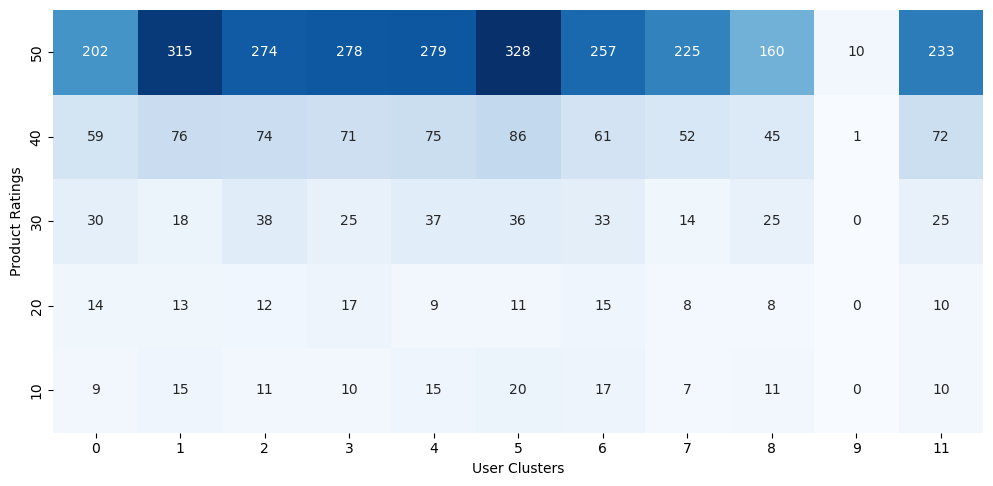

In [27]:
x = df[df['label_id'] != 10]
ct = pd.crosstab(index=x['ratingValue'], columns=x['label_id'].dropna().astype(int))
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(ct.iloc[::-1], square=True, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('User Clusters')
ax.set_ylabel('Product Ratings')

<AxesSubplot:xlabel='label_id'>

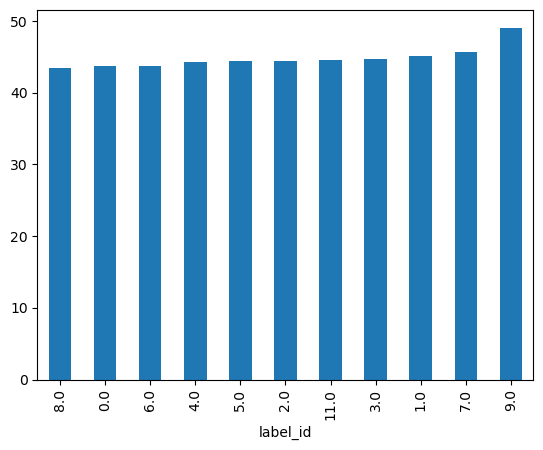

In [26]:
x.groupby('label_id')['ratingValue'].mean().sort_values().plot(kind='bar')

Text(373.97222222222223, 0.5, 'Brands')

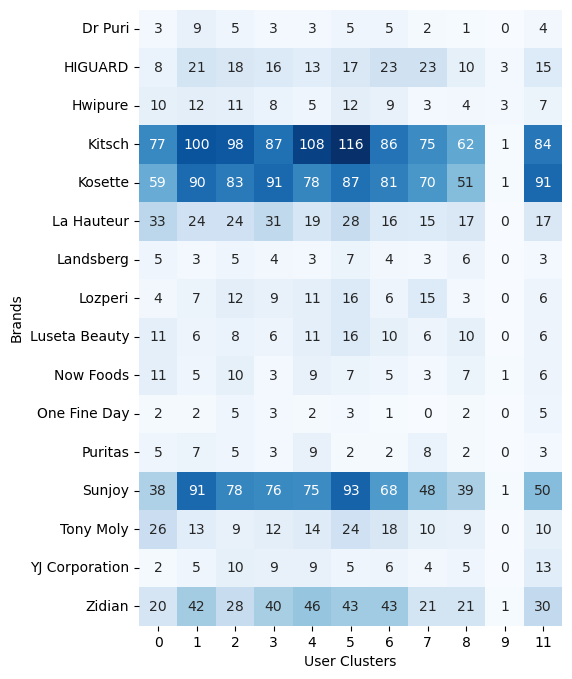

In [21]:
ct = pd.crosstab(index=x['brand'], columns=x['label_id'].dropna().astype(int))
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(ct, square=True, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('User Clusters')
ax.set_ylabel('Brands')

In [28]:
x.groupby('label_id')['brand'].nunique()

label_id
0.0     16
1.0     16
2.0     16
3.0     16
4.0     16
5.0     16
6.0     16
7.0     15
8.0     16
9.0      7
11.0    16
Name: brand, dtype: int64

In [38]:
XX = x.groupby('label_id')[['reviewCount', 'answerCount']].mean().reset_index()

In [40]:
XX

,label_id,reviewCount,answerCount
0,0.0,49.585987,1.643312
1,1.0,81.322654,2.356979
2,2.0,86.696822,3.420538
3,3.0,71.531172,1.536160
4,4.0,83.385542,2.906024
5,5.0,65.742204,2.147609
6,6.0,64.853786,3.143603
7,7.0,89.173203,1.663399
8,8.0,42.433735,2.248996
9,9.0,164.454545,428.454545


In [48]:
plt.style.use('ggplot')

<AxesSubplot:xlabel='label_id', ylabel='answerCount'>

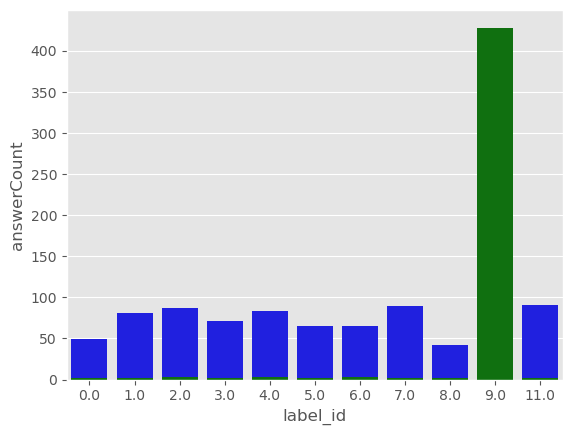

In [49]:
ax = sns.barplot(data=XX, x='label_id', y='reviewCount', color='b')
sns.barplot(data=XX, x='label_id', y='answerCount', color='g')

Text(0.5, 0, 'User Clusters')

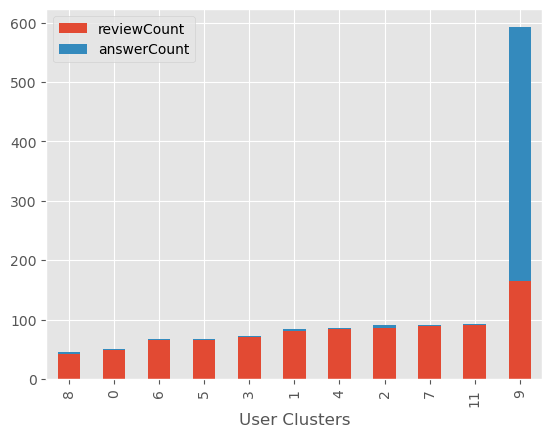

In [54]:
XX['label_id'] = XX['label_id'].astype(int)
ax = XX.set_index('label_id').sort_values('reviewCount').plot.bar(stacked=True)
ax.set_xlabel('User Clusters')

In [55]:
from calplot import calplot

In [70]:
tdf = df.copy()
tdf.index = pd.to_datetime(df['postedDate'])
tdf['counter'] = 1

/home/jaidevd/conda/lib/python3.9/site-packages/calplot/calplot.py:193: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  ax.set_xticks([by_day.loc[pd.Timestamp(
/home/jaidevd/conda/lib/python3.9/site-packages/calplot/calplot.py:193: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  ax.set_xticks([by_day.loc[pd.Timestamp(


(<Figure size 1000x340 with 2 Axes>,
 array([<AxesSubplot:ylabel='2020'>, <AxesSubplot:ylabel='2021'>],
       dtype=object))

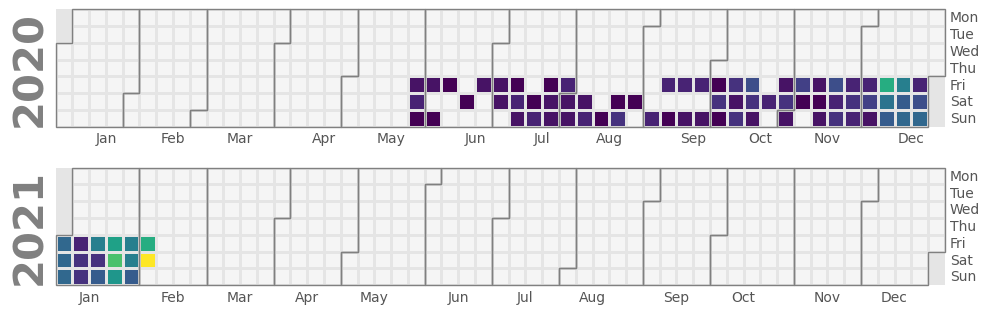

In [77]:
calplot(tdf[tdf['label_id'] == 6]['counter'])

In [67]:
tdf.head()

id
05c2b17e-c28d-4792-930d-27e787d8d4ad   2021-01-27 09:04:10.569000+00:00
80e44af8-2edf-4b81-a80a-7e7888d03cc0   2021-02-07 00:56:39.055000+00:00
9a76e047-21e4-4da3-8b50-9d2396519b6b   2021-02-06 21:40:02.886000+00:00
2890ac54-8707-418e-be3e-8d46231e3672   2021-02-05 16:29:28.906000+00:00
9db33354-0457-4efa-bc9c-b5f7ee0eff31   2021-02-05 09:43:42.367000+00:00
Name: postedDate, dtype: datetime64[ns, UTC]

In [63]:
tdf.head()

,abuseCount,customerNickname,helpfulNo,helpfulYes,imagesCount,languageCode,productId,ratingValue,reviewText,reviewTitle,...,product_name,material,n_masks,brand,product_price,dayofweek,hour,label_id,answerCount,reviewCount
postedDate,,,,,,,,,,,,,,,,,,,,,
2021-01-27 09:04:10.569000+00:00,0,iHerb Customer,0,6,1,en-US,103839,50,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice,...,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85,2,9,4.0,0.0,34.0
2021-02-07 00:56:39.055000+00:00,0,iHerb Customer,0,0,0,ru-RU,103839,50,Внуку очень понравилось. Удобная маска.,Прекрасно!,...,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85,6,0,8.0,0.0,37.0
2021-02-06 21:40:02.886000+00:00,0,iHerb Customer,0,0,0,en-US,103839,40,Easy to put on & comfortable to wear.,Good,...,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85,5,21,6.0,0.0,3.0
2021-02-05 16:29:28.906000+00:00,0,InnaIgorevna,0,0,0,ru-RU,103839,40,"Тонкая, приятная к телу маска. Расцветка тоже ...",Хорошо,...,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85,4,16,1.0,0.0,16.0
2021-02-05 09:43:42.367000+00:00,0,iHerb Customer,0,0,0,ru-RU,103839,50,Отличная маска! Мне подошла идеально. Слегка е...,Прекрасно!,...,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85,4,9,2.0,0.0,19.0
